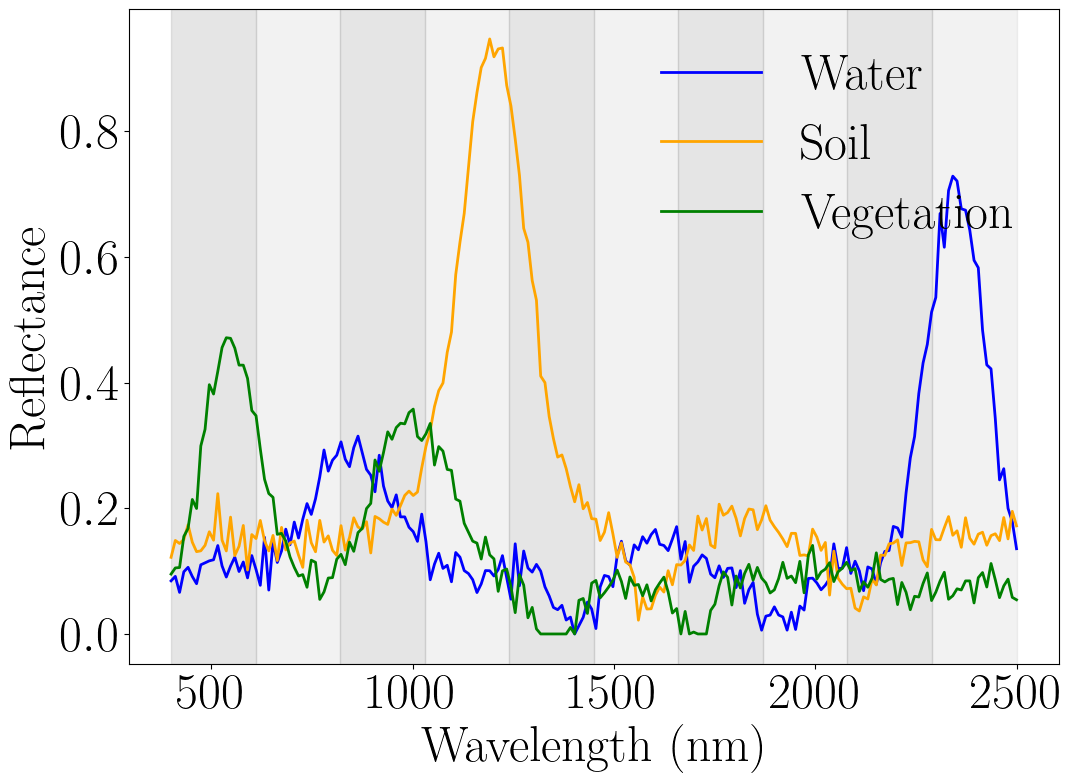

In [87]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.size": 36  # Adjust this value for larger/smaller fonts
})

# Generate example wavelengths (in nm)
wavelengths = np.linspace(400, 2500, 200)  # Visible to shortwave infrared

# Simulate spectral signatures for three different materials with shifted peaks
reflectance_material_1 = (
    0.1 + 0.6 * np.exp(-0.0001 * (wavelengths - 2350) ** 2)  # Broad peak in green (visible)
    + 0.2 * np.exp(-0.00005 * (wavelengths - 850) ** 2)     # Near-infrared reflectance peak
    - 0.1 * np.exp(-0.0003 * (wavelengths - 1400) ** 2)     # Water absorption band
    - 0.08 * np.exp(-0.0002 * (wavelengths - 1900) ** 2)    # SWIR absorption band
    + 0.05 * np.exp(-0.00015 * (wavelengths - 1600) ** 2)   # Small SWIR feature
)

reflectance_material_2 = (
    0.15 + 0.5 * np.exp(-0.0001 * (wavelengths - 1200) ** 2)  # Shifted broad peak
    + 0.3 * np.exp(-0.00004 * (wavelengths - 1200) ** 2)     # Different NIR peak
    - 0.12 * np.exp(-0.00025 * (wavelengths - 1600) ** 2)    # Modified absorption band
    - 0.1 * np.exp(-0.0002 * (wavelengths - 2100) ** 2)      # Different SWIR absorption band
    + 0.04 * np.exp(-0.0001 * (wavelengths - 1800) ** 2)     # Small SWIR feature
)

reflectance_material_3 = (
    0.08 + 0.4 * np.exp(-0.00012 * (wavelengths - 550) ** 2)  # Peak in blue-visible range
    + 0.25 * np.exp(-0.00005 * (wavelengths - 1000) ** 2)     # Stronger NIR peak
    - 0.15 * np.exp(-0.00035 * (wavelengths - 1350) ** 2)     # Absorption band
    - 0.09 * np.exp(-0.0003 * (wavelengths - 1700) ** 2)      # SWIR absorption band
    + 0.03 * np.exp(-0.00012 * (wavelengths - 2000) ** 2)     # SWIR feature
)

# Add some noise to simulate measurement variability
noise_1 = 0.02 * np.random.randn(len(wavelengths))
noise_2 = 0.02 * np.random.randn(len(wavelengths))
noise_3 = 0.02 * np.random.randn(len(wavelengths))

reflectance_material_1 = np.clip(reflectance_material_1 + noise_1, 0, 1)
reflectance_material_2 = np.clip(reflectance_material_2 + noise_2, 0, 1)
reflectance_material_3 = np.clip(reflectance_material_3 + noise_3, 0, 1)

# Plot the spectral signatures
plt.figure(figsize=(12, 8.5))

plt.plot(wavelengths, reflectance_material_1, label='Water', color='blue', linewidth=2)
plt.plot(wavelengths, reflectance_material_2, label='Soil', color='orange', linewidth=2)
plt.plot(wavelengths, reflectance_material_3, label='Vegetation', color='green', linewidth=2)

# Add vertical bands for spectral ranges
band_positions = np.linspace(400, 2500, 11)  # Define the positions for vertical bands
for i in range(len(band_positions) - 1):
    plt.axvspan(band_positions[i], band_positions[i + 1], color='gray', alpha=0.2 if i % 2 == 0 else 0.1)

plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance')

plt.legend()
plt.legend(facecolor='yellow', edgecolor='black', framealpha=0)

plt.savefig('figures/spectral-signatures.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

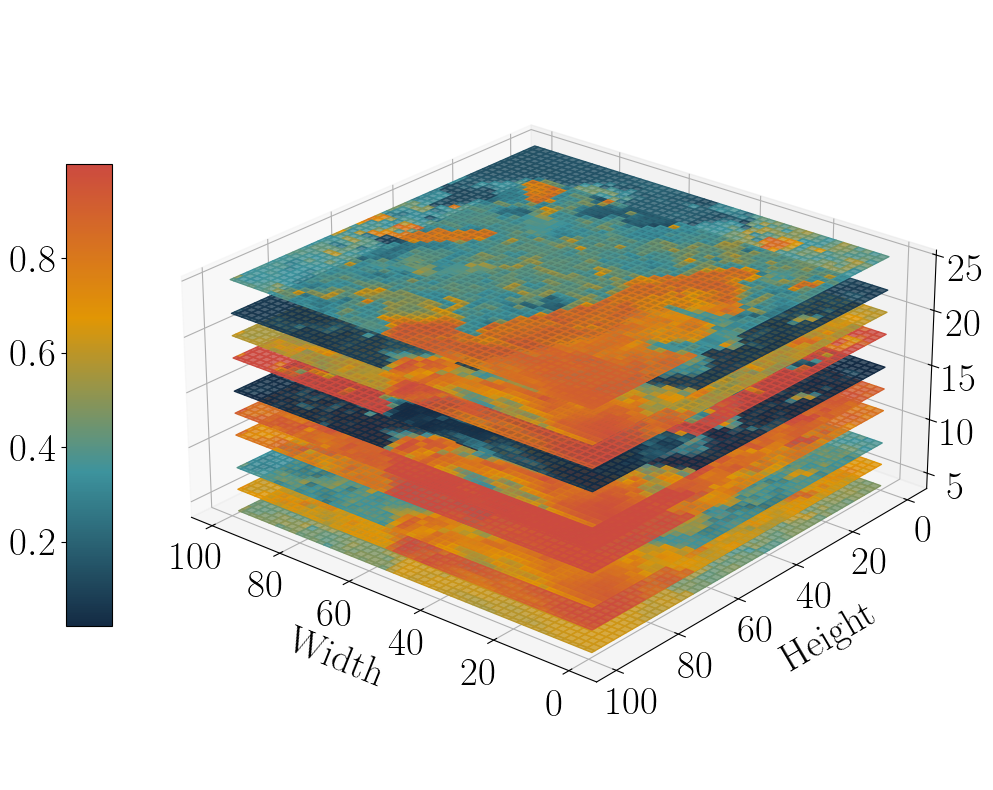

In [5]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from matplotlib import cm
from matplotlib.colors import Normalize
import matplotlib.colorbar as mcolorbar

# Normalize the color range for the Z-axis

original_cmap = plt.get_cmap('YlGnBu')

colors = original_cmap(np.linspace(0, 1, 256))

colors = [
    (20/255,43/255,68/255),
    (61/255, 147/255, 157/255),
    (225/255, 150/255, 4/255),
    (204/255,74/255,64/255)
]
import matplotlib.colors as mcolors
# Create a custom colormap
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", colors, N=256)


# Use LaTeX fonts for Matplotlib
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.size": 28  # Adjust this value for larger fonts
})

# Load the image and downsample for larger pixels
image_path = "figures/hyperspectral-image-crimea.png"  # Replace with your image path
image = Image.open(image_path).convert("RGB")
image = image.resize((100, 100))  # Reduce resolution for larger pixels
image_array = np.array(image)

# Define the number of fake spectral bands (e.g., 10 bands)
num_bands = 10
height, width, channels = image_array.shape

# Initialize an empty hyperspectral cube (height x width x num_bands)
hypercube = np.zeros((height, width, num_bands))

# Generate each "spectral" band by applying transformations
for band in range(num_bands):
    transformed_band = image_array.copy()
    transformed_band[:, :, 0] = np.clip(transformed_band[:, :, 0] * (1 + 0.1 * band), 0, 255)
    transformed_band[:, :, 1] = np.clip(transformed_band[:, :, 1] * (1 - 0.05 * band), 0, 255)
    transformed_band[:, :, 2] = np.clip(transformed_band[:, :, 2] * (1 + 0.05 * band), 0, 255)
    grayscale_band = np.dot(transformed_band[..., :3], [0.2989, 0.5870, 0.1140])
    hypercube[:, :, band] = grayscale_band

# Normalize hypercube data to [0, 1] for color mapping
hypercube = hypercube / 255.0

# Define a list of nonlinear transformations
nonlinear_transforms = [
    lambda x: np.exp(x) / np.exp(1),  # Exponential transformation
    lambda x: np.log1p(x),  # Logarithmic transformation (log(1 + x))
    lambda x: np.sqrt(x),  # Square root transformation
    lambda x: np.power(x, 2),  # Quadratic transformation
    lambda x: np.power(x, 3),  # Cubic transformation
    lambda x: np.sin(np.pi * x),  # Sine wave transformation
    lambda x: np.cos(np.pi * x),  # Cosine wave transformation
    lambda x: 1 - np.exp(-x),  # Inverse exponential transformation
    lambda x: np.tanh(3 * x),  # Hyperbolic tangent
    lambda x: 1 / (1 + np.exp(-5 * (x - 0.5)))  # Sigmoid transformation
]


# Plotting the sliced hyperspectral cube
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect([1, 1, 0.5])  # Aspect ratio for better visibility

# Plot each spectral band as a 2D slice in the 3D plot
x, y = np.meshgrid(range(width), range(height))

# Define specific spectral band values for the Z-axis
spectral_band_values = np.linspace(4, 25, num_bands)  # Example values (e.g., 400 nm to 700 nm)

for band in range(num_bands):
    z = np.full_like(x, spectral_band_values[band])  # Use spectral values for Z-axis
    # Normalize values for visualization
    band_data = hypercube[:, :, band]
    norm_band_data = (band_data - band_data.min()) / (band_data.max() - band_data.min())  # Normalize data

    # Apply a different nonlinear transformation to each layer
    transformed_data = nonlinear_transforms[band % len(nonlinear_transforms)](norm_band_data)
    transformed_data = np.clip(transformed_data, 0, 1)  # Ensure values are within [0, 1]

    # Apply base colormap with transformed data
    color_map_values = custom_cmap.reversed()(transformed_data)

    ax.plot_surface(
        x, y, z, rstride=2, cstride=2,
        facecolors=color_map_values,
        shade=False, alpha=0.8
    )

# Set labels and viewing angle with LaTeX rendering
ax.set_xlabel(r'{Width}', labelpad=20)
ax.set_ylabel(r'{Height}', labelpad=20)
ax.set_zlabel(r'{Wavelength (nm $\times 10^2$)}', labelpad=20)  # Z-axis label with units (e.g., nm)
ax.view_init(elev=25, azim=130)


norm = Normalize(vmin=hypercube.min(), vmax=hypercube.max())
scalar_mappable = cm.ScalarMappable(cmap=custom_cmap, norm=norm)
scalar_mappable.set_array([])

# Plot the vertical color bar to represent Z values
fig.colorbar(scalar_mappable, ax=ax, shrink=0.6, aspect=10, pad=0.05, location='left')

plt.savefig("figures/hypercube.png", dpi=300, transparent=True)

plt.show()